In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv("stockx_train.csv")
test=pd.read_csv("stockx_test.csv")
label=pd.read_csv("stocky_train.csv") 

In [29]:
train.head()

,High
0,332.83
1,333.87
2,330.75
3,328.77
4,322.29


In [30]:
label.head()

,High
0,333.87
1,330.75
2,328.77
3,322.29
4,315.72


In [0]:
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils 
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model
from keras.optimizers import adam

In [0]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
x_train=mm.fit_transform(train)
y_train=mm.fit_transform(label)

In [33]:
x_train.shape

(1257, 1)

In [0]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))

In [35]:
x_train

array([[[0.09640129]],

       [[0.09834351]],

       [[0.09251685]],

       ...,

       [[0.96485331]],

       [[0.95807422]],

       [[0.94257381]]])

In [36]:
x_train.shape

(1257, 1, 1)

In [37]:
y_train.shape

(1257, 1)

In [0]:
xtrain=x_train[:1000]
ytrain=y_train[:1000]
xlabel=x_train[1000:]
ylabel=y_train[1000:]

In [39]:
print(xtrain.shape)
print(ytrain.shape)
print(xlabel.shape)
print(ylabel.shape)

(1000, 1, 1)
(1000, 1)
(257, 1, 1)
(257, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
regressor=Sequential()
regressor.add(LSTM(units=32,return_sequences=True,input_shape=(None,1)))
regressor.add(LSTM(units=3))
regressor.add(Dense(units=1))
regressor.compile(optimizer=adam(lr=0.0007),loss='mean_squared_error',metrics=['accuracy'])
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 32)          4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 3)                 432       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 4,788
Trainable params: 4,788
Non-trainable params: 0
_________________________________________________________________


In [41]:
hist=regressor.fit(xtrain,ytrain,epochs=50,batch_size=32,validation_data=(xlabel,ylabel))

Train on 1000 samples, validate on 257 samples
Epoch 1/50
1000/1000 [==============================] - 1s 892us/step - loss: 0.1750 - accuracy: 0.0010 - val_loss: 0.6732 - val_accuracy: 0.0000e+00
Epoch 2/50
1000/1000 [==============================] - 0s 83us/step - loss: 0.1471 - accuracy: 0.0010 - val_loss: 0.5912 - val_accuracy: 0.0000e+00
Epoch 3/50
1000/1000 [==============================] - 0s 95us/step - loss: 0.1167 - accuracy: 0.0010 - val_loss: 0.4859 - val_accuracy: 0.0000e+00
Epoch 4/50
1000/1000 [==============================] - 0s 96us/step - loss: 0.0829 - accuracy: 0.0010 - val_loss: 0.3546 - val_accuracy: 0.0000e+00
Epoch 5/50
1000/1000 [==============================] - 0s 84us/step - loss: 0.0510 - accuracy: 0.0010 - val_loss: 0.2249 - val_accuracy: 0.0000e+00
Epoch 6/50
1000/1000 [==============================] - 0s 87us/step - loss: 0.0316 - accuracy: 0.0010 - val_loss: 0.1363 - val_accuracy: 0.0039
Epoch 7/50
1000/1000 [==============================] - 0s 84u

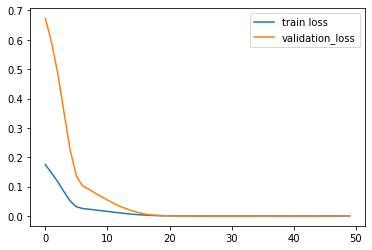

In [42]:
plt.plot(hist.history['loss'],label="train loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()

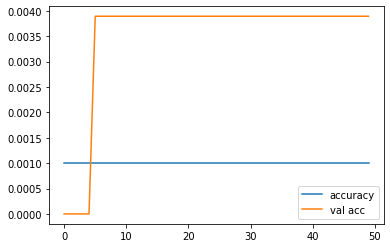

In [43]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.legend()

In [0]:
y_pred=regressor.predict(xlabel)

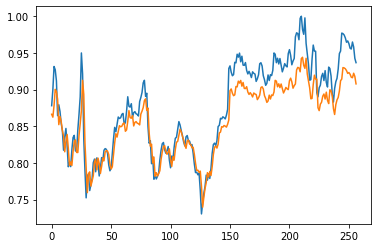

In [45]:
plt.plot(ylabel)
plt.plot(y_pred)
plt.show()

In [46]:
sc=MinMaxScaler(feature_range=(0,1))
test=sc.fit_transform(test)
test=test.reshape((test.shape[0],test.shape[1],1))
test.shape

(19, 1, 1)

In [0]:
y_pred=regressor.predict(test)

In [0]:
y_pred=sc.inverse_transform(y_pred)

In [0]:
result=pd.DataFrame(y_pred)

In [50]:
result.head()

,0
0,791.607910
1,792.618591
2,794.731689
3,807.153992
4,809.413086


40 Time Step LSTM

In [0]:
new_data=pd.read_csv("stockx_train.csv")
test_data=pd.read_csv("stockx_test.csv")

In [0]:
new_data=pd.concat((new_data,test_data))

In [53]:
new_data.shape

(1276, 1)

In [0]:
dataset=new_data.values

In [55]:
dataset.shape

(1276, 1)

In [0]:
 train=dataset[0:1257,:]
 valid=dataset[1257:,:]

In [57]:
valid.shape

(19, 1)

In [0]:
mm=MinMaxScaler(feature_range=(0,1))
scaler_data=mm.fit_transform(dataset)

In [0]:
x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaler_data[i-40:i,0])
    y_train.append(scaler_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
print(x_train.shape)
print(y_train.shape)

(1217, 40)
(1217,)


In [62]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1217, 40, 1)


In [64]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
1217/1217 [==============================] - 36s 29ms/step - loss: 0.0030
Epoch 2/5
1217/1217 [==============================] - 30s 25ms/step - loss: 0.0010
Epoch 3/5
1217/1217 [==============================] - 30s 25ms/step - loss: 9.4302e-04
Epoch 4/5
1217/1217 [==============================] - 31s 25ms/step - loss: 6.6430e-04
Epoch 5/5
1217/1217 [==============================] - 30s 25ms/step - loss: 5.2438e-04


In [65]:
valid.shape

(19, 1)

In [0]:
inputs = new_data[len(new_data) - len(valid) - 40:].values
inputs = inputs.reshape(-1,1)
inputs  = mm.transform(inputs)

In [69]:
inputs.shape

(59, 1)

In [0]:
X_test = []
for i in range(40,inputs.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)

In [71]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

NameError: ignored

In [72]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

811.6642332995267

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


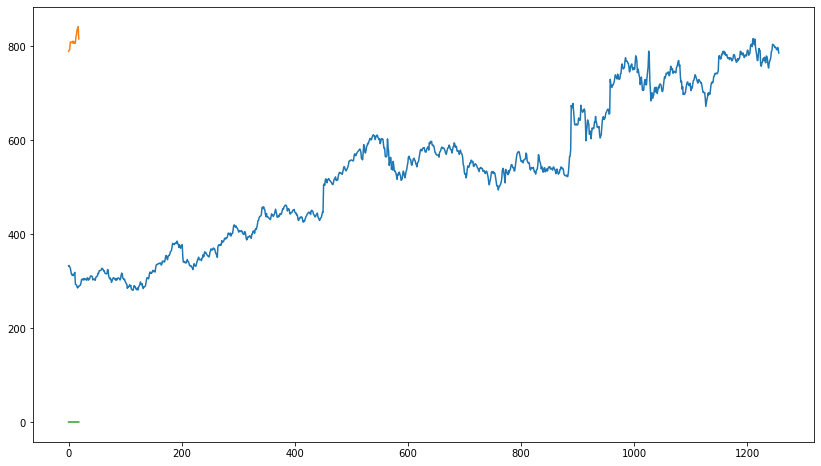

In [73]:
plt.figure(figsize=(14,8))
train = new_data[:1257]
valid = new_data[1257:]
valid['Predictions'] = closing_price
plt.plot(train['High'])
plt.plot(valid[['High','Predictions']])
plt.show()

In [0]:
df=pd.DataFrame(closing_price)

In [0]:
df.columns= ['High']

In [76]:
df.head()

,High
0,0.908883
1,0.910662
2,0.915419
3,0.921460
4,0.941682
